In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

matplotlib.rcParams.update({'font.size': 14})

**Метрики** в машинном обучении нужны для того, чтобы оценивать качество работы модели, чтобы понимать, а насколько модель хорошо запомнила закономерности из обучающей выборки.  

Сегодня продолжаем рассматривать метрики для **задачи классификации**. Для такой задачи хочется, чтобы наши модели как можно чаще предсказывали верную метку класса объекта.

<img src='https://static.javatpoint.com/tutorial/machine-learning/images/classification-algorithm-in-machine-learning.png' width=600>


До этого считали метрики только для одного класса (мошенническая транзакция, больной человек, выдача кредита), на второй класс (обычная транзакция, здоровый человек, отказ в кредите) мы не обращали внимание, считали метрику только для **целевого класса**.  
Но бывает, что оба класса нам важны и мы хотим их одинаково хорошо предсказывать, тут мы можем считать метрики precision, recall, f-score для обоих классов, сначала для первого, потом для второго и смотреть, что говорят нам метрики.

Снова возьмем данные по задаче кредитного скоринга.   
0 классом помечаем клиентов, которые кредит не вернут, а 1 - которые вернут.

In [ ]:
clients = [0, 0, 0, 0, 0,
           1, 1, 1, 1, 1]
first_model_pred = [0, 0, 1, 1, 1,
                    1, 1, 1, 1, 1]
second_model_pred = [0, 0, 0, 0, 0,
                     1, 1, 0, 0, 0]


df = pd.DataFrame({
    'clients': clients,
    'first_model': first_model_pred,
    'second_model': second_model_pred
})

df

,clients,first_model,second_model
0,0,0,0
1,0,0,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,1,1
6,1,1,1
7,1,1,0
8,1,1,0
9,1,1,0


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(df['clients'], df['first_model']))

              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.62      1.00      0.77         5

    accuracy                           0.70        10
   macro avg       0.81      0.70      0.67        10
weighted avg       0.81      0.70      0.67        10



Получили хорошие метрики для первого класса (выдача кредита): `precision 0.62, recall 1, f-score 0.77` и чуть похуже для нулевого класса (отказ в кредите): `precision 1, recall 0.4, f-score 0.57`.

- Получается, что мы лучше работаем с объектами **первого класса**, с теми людьми, которым стоит *выдать кредит*, мы находим их всех (recall единичный), но как первый класс классифицировалось слишком много *лишних объектов* (precision не единичный), то есть есть такие люди, которые не готовы выплачивать кредит, но наша модель одобрила им деньги.
- Зато, как **нулевой класс** мы классифицируем *только* клиентов, которым не нужно было выдавать кредит (precision единичный), но недобросовестные клиенты нашлись *не все* (recall не единичный).

Поизучать метрики двух классов и сделать о них выводы несложная задача, но что делать, когда классов не две штуки, а 50 или 1000? Сможем ли мы для каждого класса посчитать метрику и адекватно её проанализировать?

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000,
                           n_features=60,
                           n_informative=60,
                           n_redundant=0,
                           n_classes=50,
                           n_clusters_per_class=1,
                           random_state=1)

X.shape, y.shape

((1000, 60), (1000,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=10,
                              random_state=1)
tree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
pred = tree.predict(X)

In [ ]:
print(classification_report(y, pred))

              precision    recall  f1-score   support

           0       0.43      0.65      0.52        20
           1       0.35      0.35      0.35        20
           2       0.67      0.30      0.41        20
           3       0.22      0.65      0.33        20
           4       1.00      0.45      0.62        20
           5       0.15      0.58      0.24        19
           6       0.26      0.47      0.34        19
           7       0.60      0.57      0.59        21
           8       0.40      0.57      0.47        21
           9       1.00      0.45      0.62        20
          10       0.46      0.29      0.35        21
          11       1.00      0.42      0.59        19
          12       0.31      0.40      0.35        20
          13       0.72      0.65      0.68        20
          14       0.17      0.30      0.21        20
          15       0.83      0.50      0.62        20
          16       1.00      0.21      0.35        19
          17       1.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Теперь уже не так просто поизучать каждый класс в отдельности, глаза начинают разбегаться. Конечно мы сможем проанализировать метрики для каждого класса, но на это потребуется очень много времени, поэтому чтобы это время не тратить, можно пользоваться усредненными метриками.

Для простоты расчетов будем рассматривать усредненные метрики на небольшом примере. Выборка из 15 объектов двух классов, 5 объектов - нулевой класс, 10 объектов - первый класс.

И сделаем случайные предсказания.

In [ ]:
true = [0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

pred = [0, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

df = pd.DataFrame({
    'ground truth': true,
    'pred': pred
})

df

,ground truth,pred
0,0,0
1,0,0
2,0,0
3,0,1
4,0,1
5,1,0
6,1,0
7,1,0
8,1,0
9,1,1


И сделаем новый столбик для обозначения корректности предсказания. True - истина совпадает с предсказанием, False - истина не совпадает с предсказанием.

In [ ]:
df['correct'] = df['ground truth'] == df['pred']
df

,ground truth,pred,correct
0,0,0,True
1,0,0,True
2,0,0,True
3,0,1,False
4,0,1,False
5,1,0,False
6,1,0,False
7,1,0,False
8,1,0,False
9,1,1,True


# Усреднения

## Micro

Микро усреднение представляет из себя сумму верных срабатываний для обоих классов, деленное на количество объектов.

Посчитаем верные срабатывания для нулевого класса. Получилось 3 True Positive.

In [ ]:
df['correct_0'] = (df['correct']) & (df['ground truth'] == 0)
df

,ground truth,pred,correct,correct_0
0,0,0,True,True
1,0,0,True,True
2,0,0,True,True
3,0,1,False,False
4,0,1,False,False
5,1,0,False,False
6,1,0,False,False
7,1,0,False,False
8,1,0,False,False
9,1,1,True,False


Теперь посчитаем верные срабатывания для первого класса. True Positive получилось 6 штук.

In [ ]:
df['correct_1'] = (df['correct']) & (df['ground truth'] == 1)
df

,ground truth,pred,correct,correct_0,correct_1
0,0,0,True,True,False
1,0,0,True,True,False
2,0,0,True,True,False
3,0,1,False,False,False
4,0,1,False,False,False
5,1,0,False,False,False
6,1,0,False,False,False
7,1,0,False,False,False
8,1,0,False,False,False
9,1,1,True,False,True


Просуммируем верные срабатывания нулевого класса и первого. В сумме вышло 9 True Positive.

In [ ]:
TP_full = df['correct_0'].sum() + df['correct_1'].sum()
TP_full

9

Остается только поделить на общее количество объектов:

In [ ]:
micro = TP_full / df.shape[0]
micro

0.6

Метрика precision по микро усреднению вышла 0.6. Метрика recall по микро усреднению тоже получится 0.6. А метрика f-score по микро усреднению, как не удивительно, тоже будет 0.6.

Убедимся в этом с помощью функций `precision_score`, `recall_score`, `f1_score` и поставим им `average='micro'`.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

micro_precision = precision_score(df['ground truth'], df['pred'], average='micro')
micro_recall = recall_score(df['ground truth'], df['pred'], average='micro')
micro_f1_score = f1_score(df['ground truth'], df['pred'], average='micro')

print(f'MICRO')
print(f'precision {micro_precision}')
print(f'recall {micro_recall}')
print(f'f1_score {micro_f1_score}')

MICRO
precision 0.6
recall 0.6
f1_score 0.6


*Не напоминает ли что-то описание микро-усреднения и его рассчет?*

Очень походит на accuracy, собственно так оно и есть, микро усреднение любой метрики (будь то precision, recall, f-score) всегда будет давать значение accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(df['ground truth'], df['pred'])

0.6

Именно поэтому в `classification_report` пишется только одна цифра микро усреднения, которая показывает метрику accuracy.

In [ ]:
print(classification_report(df['ground truth'], df['pred']))

              precision    recall  f1-score   support

           0       0.43      0.60      0.50         5
           1       0.75      0.60      0.67        10

    accuracy                           0.60        15
   macro avg       0.59      0.60      0.58        15
weighted avg       0.64      0.60      0.61        15



## Macro

Для подсчета макро усреднения сначала нужно посчитать метрику для одного класса, потом для другого и найти среднее арифметическое.

### Precision

Посчитаем precision для нулевого класса.

Можем руками с помощью TP и FP:

In [ ]:
df[['ground truth', 'pred']]

,ground truth,pred
0,0,0
1,0,0
2,0,0
3,0,1
4,0,1
5,1,0
6,1,0
7,1,0
8,1,0
9,1,1


In [ ]:
TP_0 = ((df['ground truth'] == 0) & (df['pred'] == 0)).sum()
TP_0

3

In [ ]:
FP_0 = ((df['ground truth'] == 1) & (df['pred'] == 0)).sum()
FP_0

4

In [ ]:
precision_0 = TP_0 / (TP_0 + FP_0)
precision_0

0.42857142857142855

Либо тоже самое могли бы получить с помощью функции `precision_score`, если в атрибут `average` передадим `'binary'` и в атрибуте `pos_label` укажем `0`. В этом случае метрика будет считаться только для нулевого класса, считая его целевым.

In [ ]:
precision_0 = precision_score(df['ground truth'], df['pred'],
                              average='binary',
                              pos_label=0)

precision_0

0.42857142857142855

Посчитаем precision для первого класса. Воспользуемся функцией `precision_score`. Поменяем `pos_label` на `1`.

In [ ]:
precision_1 = precision_score(df['ground truth'], df['pred'],
                              average='binary',
                              pos_label=1)

precision_1

0.75

Две метрики нашли, теперь остается только найти среднее арифметическое:

In [ ]:
(0.428 + 0.75) / 2

0.589

In [ ]:
macro_precision = (precision_0 + precision_1) / 2
macro_precision

0.5892857142857143

Метрика precision по макро усреднению вышла 0.59.

Убедимся в этом с помощью функций `precision_score` и поставим ей `average='macro'`.

In [ ]:
macro_precision = precision_score(df['ground truth'], df['pred'], average='macro')

print(f'MACRO')
print(f'precision {macro_precision}')

MACRO
precision 0.5892857142857143


### Recall

Найдем recall по макро усреднению.

Вызовем функцию `recall_score` и в атрибут `average` передадим `'binary'`, а в атрибут `pos_label` `0`.

In [ ]:
recall_0 = recall_score(df['ground truth'], df['pred'],
                        average='binary',
                        pos_label=0)

recall_0

0.6

Посчитаем recall для первого класса. Воспользуемся функцией `recall_score`. Поменяем `pos_label` на `1`.

In [ ]:
recall_1 = recall_score(df['ground truth'], df['pred'],
                        average='binary',
                        pos_label=1)

recall_1

0.6

Нашли два recall и найдем  среднее арифметическое:

In [ ]:
macro_recall = (recall_0 + recall_1) / 2
macro_recall

0.6

Метрика recall по макро усреднению вышла 0.6.

Убедимся в этом с помощью функций `recall_score` и поставим ей `average='macro'`.

In [ ]:
macro_recall = recall_score(df['ground truth'], df['pred'], average='macro')

print(f'MACRO')
print(f'recall {macro_recall}')

MACRO
recall 0.6


### F-score

И остаётся найти f-score по макро усреднению.

Вызовем функцию `f1_score`, как всегда в атрибут `average` передадим `'binary'`, а в атрибут `pos_label` `0`.

In [ ]:
f1_0 = f1_score(df['ground truth'], df['pred'],
                average='binary',
                pos_label=0)

f1_0

0.5

Посчитаем f-score для первого класса.

In [ ]:
f1_1 = f1_score(df['ground truth'], df['pred'],
                average='binary',
                pos_label=1)

f1_1

0.6666666666666665

Нашли две F-меры, пора усреднить их.

In [ ]:
macro_f1 = (f1_0 + f1_1) / 2
macro_f1

0.5833333333333333

Метрика f1-score по макро усреднению вышла 0.58.

Проверим наши вычисления с помощью функций `f1_score` и поставим ей `average='macro'`.

In [ ]:
macro_f1 = f1_score(df['ground truth'], df['pred'], average='macro')

print(f'MACRO')
print(f'f1 {macro_f1}')

MACRO
f1 0.5833333333333333


И всё вместе могли бы посмотреть через `classification_report` в строке `macro`.

In [ ]:
print(f'MACRO')
print(f'precision {macro_precision}')
print(f'recall {macro_recall}')
print(f'f1 {macro_f1}')

MACRO
precision 0.5892857142857143
recall 0.6
f1 0.5833333333333333


In [ ]:
print(classification_report(df['ground truth'], df['pred']))

              precision    recall  f1-score   support

           0       0.43      0.60      0.50         5
           1       0.75      0.60      0.67        10

    accuracy                           0.60        15
   macro avg       0.59      0.60      0.58        15
weighted avg       0.64      0.60      0.61        15



## Weighted

Начало подсчета метрики по взвешенному усреднению очень похоже на начало подсчета макро усреднения. Берем метрику для одного класса, берем метрику для другого и вместо среднего арифметического ищем взвешенное среднее.

### Precision

Precision для нулевого и первого классов уже есть.

In [ ]:
precision_0, precision_1

(0.42857142857142855, 0.75)

Теперь посчитаем, сколько нулей есть в нашем наборе данных. Их пять штук.

In [ ]:
zeros = (df['ground truth'] == 0).sum()
zeros

5

И посчитаем, сколько единиц. Их 10.

In [ ]:
ones = (df['ground truth'] == 1).sum()
ones

10

И так же посчитаем, сколько всего объектов в данных. Их 15.

In [ ]:
total = df.shape[0]
total

15

Две метрики посчитаны, количество объектов каждого класса знаем, ищем взвешенное усреднение.

In [ ]:
weighted_precision = zeros / total * precision_0 + ones / total * precision_1
weighted_precision

0.6428571428571428

Метрика precision по взешанному усреднению равна 0.64.

Проверим себя через `precision_score` с `average='weighted'`.

In [ ]:
weighted_precision = precision_score(df['ground truth'], df['pred'], average='weighted')

print(f'WEIGHTED')
print(f'precision {weighted_precision}')

WEIGHTED
precision 0.6428571428571428


### Recall

In [ ]:
recall_0, recall_1

(0.6, 0.6)

Найдем recall по weighted усреднению.

Recall для обоих классов знаем, количество объектов тоже знаем, считаем взвешенное среднее для них.

In [ ]:
weighted_recall = zeros / total * recall_0 + ones / total * recall_1
weighted_recall

0.6

Метрика recall по weighted усреднению вышла 0.6.

Убедимся в этом с помощью функций `recall_score` и поставим ей `average='weighted'`.

In [ ]:
weighted_recall = recall_score(df['ground truth'], df['pred'], average='weighted')

print(f'WEIGHTED')
print(f'recall {weighted_recall}')

WEIGHTED
recall 0.6


### F-score

И остаётся найти f-score по взвешенному усреднению.

In [ ]:
weighted_f1 = zeros / total * f1_0 + ones / total * f1_1
weighted_f1

0.6111111111111109

Метрика f1-score по взвешенному усреднению равна 0.61.

Проверим наши вычисления с помощью функций `f1_score` и поставим ей `average='weighted'`.

In [ ]:
weighted_f1 = f1_score(df['ground truth'], df['pred'], average='weighted')

print(f'WEIGHTED')
print(f'f1 {weighted_f1}')

weighted
f1 0.6111111111111109


И всё вместе могли бы посмотреть через `classification_report` в строке `weighted`.

In [ ]:
print(f'WEIGHTED')
print(f'precision {weighted_precision}')
print(f'recall {weighted_recall}')
print(f'f1 {weighted_f1}')

WEIGHTED
precision 0.6428571428571428
recall 0.6
f1 0.6111111111111109


In [ ]:
print(classification_report(df['ground truth'], df['pred']))

              precision    recall  f1-score   support

           0       0.43      0.60      0.50         5
           1       0.75      0.60      0.67        10

    accuracy                           0.60        15
   macro avg       0.59      0.60      0.58        15
weighted avg       0.64      0.60      0.61        15



# Применение усредненных метрик

- Во-первых, разные усреднения метрик помогают нам, когда у нас есть много классов
- Во-вторых, разные усреднения по-разному отображают дисбаланс классов

## Micro

Микро усреднение пригодится, когда в ваших данных идеальный **баланс классов**, т.к. эта метрика является, по сути, accuracy, то она перенимает все её проблемы, в частности, необъективную оценку при дисбалансе классов.

Яркий пример задача, для которой подойдет микро усреднение - это классификация рукописных цифр на картинках, задача называется MNIST и она представлена в стандартных датасетах в `sklearn`.

Подгрузим себе данных с помощью функции `load_digits` из модуля `datasets`.

In [ ]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)

X.shape, y.shape

((1797, 64), (1797,))

Данные из себя представляют черно-белые картинки цифр размерностью 8 на 8 пикселей.

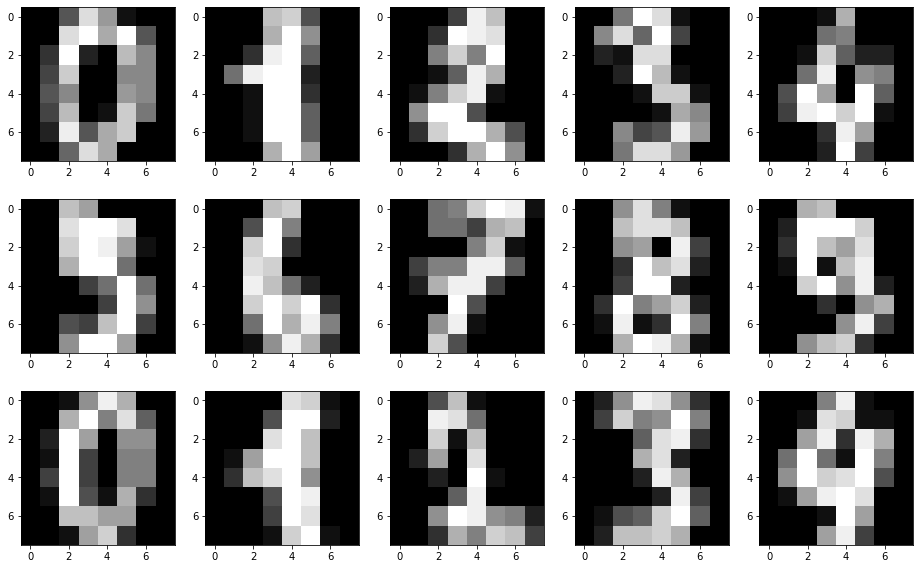

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 10))

for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]), cmap='gray')

Визуализируем распределение по классам и видим, что все столбики находятся на плюс минус одной и той же отметке, так что дисбаланса классов здесь не наблюдается.

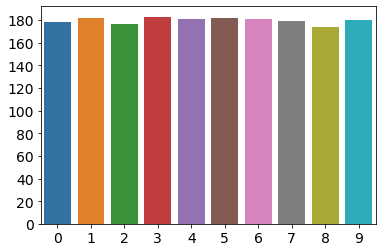

In [ ]:
import seaborn as sns

y_freq = pd.Series(y).value_counts()
sns.barplot(x=y_freq.index, y=y_freq.values);
plt.yticks(np.linspace(0, 180, 10));

Обучим простую модель на этой задаче.

In [ ]:
tree = DecisionTreeClassifier(max_depth=8,
                              random_state=1)

tree.fit(X, y)

DecisionTreeClassifier(max_depth=8, random_state=1)

In [ ]:
pred = tree.predict(X)

И посчитаем метрики. В среднем доля правильных ответов вышла 0.94 - это accuracy и это любая метрика по усреднению micro.

In [ ]:
print(classification_report(y, pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       178
           1       0.87      0.95      0.91       182
           2       0.97      0.90      0.94       177
           3       0.91      0.87      0.89       183
           4       0.99      0.97      0.98       181
           5       0.96      0.96      0.96       182
           6       1.00      0.98      0.99       181
           7       0.96      0.97      0.96       179
           8       0.86      0.89      0.87       174
           9       0.87      0.89      0.88       180

    accuracy                           0.94      1797
   macro avg       0.94      0.94      0.94      1797
weighted avg       0.94      0.94      0.94      1797



## Macro

Макро усреднение используйте, когда хотите дать всем классам одинаковый вес, вне зависимости от их количества в датасете.

К примеру, выявление мошеннических транзакций - таких случаев мало, но именно их нужно правильно распознавать.

Возьмем целевые значения для такой задачи, класс 0 - транзакция обычная, 1 - транзакция мошенническая.

И визуализируем, теперь одного класса гораздо меньше, чем другого - наглядный дисбаланс классов.

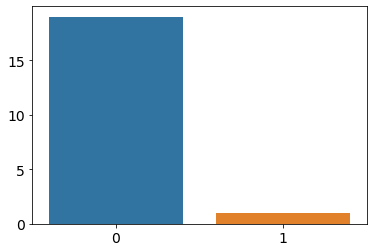

In [ ]:
target = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          1]

y_freq = pd.Series(target).value_counts()
sns.barplot(x=y_freq.index, y=y_freq.values);

Сделаем константную модель, которая всегда будет предсказывать ноль - обычная транзакция.

In [ ]:
pred = np.zeros_like(target)

In [ ]:
df = pd.DataFrame({
    'ground_truth': target,
    'pred': pred
})

df

,ground_truth,pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [ ]:
print(classification_report(df['ground_truth'], df['pred']))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.00      0.00      0.00         1

    accuracy                           0.95        20
   macro avg       0.47      0.50      0.49        20
weighted avg       0.90      0.95      0.93        20



/home/julia/.local/share/virtualenvs/teacher_geekbrains-kzZgunB2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Метрика для нулевого класса отличная: `precision 0.95, recall 1, f-score 0.97`, recall единичный, потому что нашли все объекты нулевого класса из представленных, а precision не единичный, потому что в классификацию нулевого класса попалась одна лишняя единица.

А вто с первым классом совсем всё печально, метрики нулевые.

Когда смотрим на усредненную метрику по micro, то получаем высокий показатель 0.95, но наша модель ниразу не нашла мошенническую транзакцию, в чём собственно и была суть задачи, так что метрика вообще непоказательная, зато если посмотреть на macro усреднения, то эти значения больше похожи на реальную картину:

- Precision - 0.47, получился из среднего арифметического $\frac{0.95 + 0}{2} = 0.47$
- Recall - 0.5, получился из среднего арифметического $\frac{1 + 0}{2} = 0.5$
- F-score - 0.49, получился из среднего арифметического $\frac{0.97 + 0}{2} = 0.49$

Очевидно, что с такими метриками модель в реальный бой не пустим, значит нужно что-то исправлять.   
Спасибо, макро усреднению, что учитывает оба класса, хоть даже объект первого класса у нас всего лишь один.

## Weighted

И взвешенное усреднение используйте тогда, когда хотите дать классам вес, согласно их количеству.

Например, задача классификации животных. Поставили камеру на улицах обычного российского города и хотим считать, сколько раз каждое животное появляется.

Обучались на трех классах - кошки, голуби и пингвины.

Очевидно, что на улицах пингвины просто так ходить не будут, поэтому данный класс нам не очень интересно находить с идеальными метриками, поэтому мы можем им немного пренебречь и учитывать его с соответствующим весом.

Возьмем целевые значения для задачи классификации животных, класс 0 - кот, 1 - голубь, 2 - пингвин.

И визуализируем, снова дисбаланс классов.

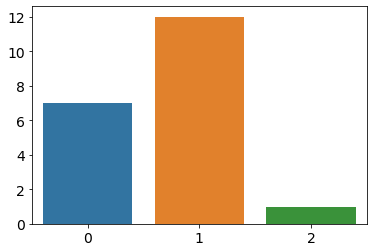

In [ ]:
target = [0, 0, 0, 0, 0, 0, 0,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          2]

y_freq = pd.Series(target).value_counts()
sns.barplot(x=y_freq.index, y=y_freq.values);

Сделаем модель, которая научилась отличать кота от голубя самым лучшим образом, но она так и не выучила пингвина.

In [ ]:
pred = [0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1]

In [ ]:
df = pd.DataFrame({
    'ground_truth': target,
    'pred': pred
})

df

,ground_truth,pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,1,1
9,1,1


In [ ]:
print(classification_report(df['ground_truth'], df['pred']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.92      1.00      0.96        12
           2       0.00      0.00      0.00         1

    accuracy                           0.95        20
   macro avg       0.64      0.67      0.65        20
weighted avg       0.90      0.95      0.93        20



/home/julia/.local/share/virtualenvs/teacher_geekbrains-kzZgunB2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0. Метрика для нулевого класса (кот) отличная: `precision 1, recall 1, f-score 1`.  
1. С первым классом (голубь) чуть похуже: `precision 0.92, recall 1, f-score 0.96`, потому что в первый класс случайно занесли нецелевой объект (в пингвине увидели голубя), то есть вышла не самая чистая классификация, есть ошибка ложного срабатывания.
2. А вот со вторым классом (пингвин) совсем беда, его ниразу не классифицировали, но и в целом, мы не ожидаем пингвинов в городе.

Если посмотрим на усредненную метрику по macro усреднения, то получаем посредственную модель, хотя для стандартного города, в котором ходят только голуби и коты, модель что надо.

Поэтому в этом случае нужно смотреть на взвешенное усреднение:

- **Precision** - 0.9, получился из взвешенного среднего $$\frac{7}{20} \cdot 1 + \frac{12}{20} \cdot 0.92 + \frac{1}{20} \cdot 0 = 0.9$$

7 котов с идеальным precision, 12 голубей с хорошим precision и 1 пингвин с плохим precision

- **Recall** - 0.95, получился из взвешенного среднего  $$\frac{7}{20} \cdot 1 + \frac{12}{20} \cdot 1 + \frac{1}{20} \cdot 0 = 0.95$$

7 котов с идеальным recall, 12 голубей с идеальным recall и 1 пингвин с плохим recall

- **F-score** - 0.93, получился из взвешенного среднего  $$\frac{7}{20} \cdot 1 + \frac{12}{20} \cdot 0.96 + \frac{1}{20} \cdot 0 = 0.93$$

7 котов с идеальным f-score, 12 голубей с хорошим f-score и 1 пингвин с плохим f-score


Метрики вышли хорошие, значит смело можем устанавливать камеру с такой моделью и наблюдать за животными в городе, пингвин появится на улице очень маловероятно.

# Summary

В этом занятии посмотрели на разные усреднения метрик для задачи классификации.

<table>

<tr>
<td>
Усреднение
</td>

<td>
Формула
</td>

<td>
Когда использовать
</td>

</tr>

<tr>
<td>
Micro
</td>

<td>

$$\frac{TP + TN}{TP + FP + TN + FN}$$

</td>

<td>
Когда НЕТ дисбаланса классов
</td>

</tr>



<tr>
<td>
Macro
</td>

<td>

$$\frac{1}{K}\sum_{i=0}^K{m_i}$$<br>
где $K$ - кол-во классов,<br> $m_i$ - метрика для $i$-го класса

</td>

<td>
Когда есть дисбаланс классов<br>Важен каждый класс

</td>

</tr>


<tr>
<td>
Weighted
</td>

<td>

$$\sum_{i=0}^K{\frac{n_i}{N}\cdot m_i}$$<br>
где $K$ - кол-во классов,<br> $m_i$ - метрика для i-го класса,<br>
$n_i$ - кол-во объектов $i$-го класса,<br>
$N$ - кол-во объектов в выборке

</td>

<td>
Когда есть дисбаланс классов<br>Важны наибольшие классы

</td>

</tr>


<table>

В целом, метрики используются для того, чтобы получить цифру оценки качества работы обученной модели, чтобы уже заранее знать, чего ожидать от модели, когда ей будем давать реальные данные, а также метрики можем использовать для обнаружения переобучения/недообучения.